### Install Libraries

In [1]:
# Installing all the required packages
install.packages("reticulate")
library(reticulate)
library(dplyr)
os <- import("os")
options(warn=1)

package 'reticulate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sundeep\AppData\Local\Temp\RtmpkTSAjK\downloaded_packages



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
#Current working directory
getwd()

[1] "C:/Users/Sundeep/Desktop"

### Change Working directory to ARTML folder

In [3]:
#Changing the working directory to where we have artml files
setwd("C:/Users/Sundeep/Downloads/artml")

### Testing on Dummy data

In [4]:
df <- data.frame(x = 1:8, f = 8:15)

In [5]:
df

x,f
1,8
2,9
3,10
4,11
5,12
6,13
7,14
8,15


In [6]:
#importing the bet file
bet <- import('bet')
# source_python("bet.py")

In [7]:
#create BET using the create_bet function
a = bet$create_bet(df)

In [8]:
a

,x,f
x,"8, 36, 204, 1296, 8772, 8, 36, 204, 1296, 8772, 204, 8772","8, 36, 204, 1296, 8772, 8, 92, 1100, 13616, 173636, 456, 36912"
f,"8, 92, 1100, 13616, 173636, 8, 36, 204, 1296, 8772, 456, 36912","8, 92, 1100, 13616, 173636, 8, 92, 1100, 13616, 173636, 1100, 173636"


In [9]:
#importing the Univariate Stats file
uni_explore <- import("univariate")

In [10]:
uni_explore$univariate(a)

,x,f
count,8.00000000,8.00000000
Mean,4.50000000,11.50000000
Variance,5.25000000,5.25000000
Standard_deviation,2.29128785,2.29128785
coeff_of_variation,50.91750772,19.92424215
skewness,0.00000000,0.00000000
Kurtosis,-0.06734694,-0.06734694


In [11]:
#Importing Bivariate stats file
bivariate_cov <- import('covariance')
bivariate_corr <- import("correlation")

In [12]:
bivariate_cov$covariance(a)

,x,f
x,5.25,5.25
f,5.25,5.25


### Case Study - Credit Fraud Detection

In [13]:
#loadining the data to the dataframe
df <- read.csv(file="Credit_train.csv", header=TRUE)

In [14]:
head(df)

seq,Credit_Default,BE_SCORE_ON_OD,BNI_SCORE_ON_OD,BUSAGE,BUSSTRUC,MAXLINEUTIL,AVGLINEUTIL12,MAXLINEBALRT,MAXTIMESLBAL12,DAYSDELQ,TOTDAYSDELQ12,TOTACBAL,MAXDELQ,TOTDELQ12,DEPOSITRT,AVGDEPRT12,ALL_OPEN_TRADE_UT,BR_OPEN_TRADE_UT,BR_TRADE_PAST_DUE
7,1,637,292,67,1,0.8702,0.768375,0.9535,0,0,0,26322.47,0,4,0.0949,0.0486,57,57,0
4,1,618,736,97,1,0.8449,0.552183,0.8449,0,0,0,84498.81,1,5,0.0000,0.2137,75,75,0
8,1,452,357,25,1,1.0927,0.962591,1.0927,8,0,0,32782.18,1,1,0.0000,0.4224,91,95,2
9,1,816,968,72,1,0.8626,0.636644,0.8583,0,0,0,64109.12,0,0,0.0104,0.6894,50,4,0
7,1,782,968,151,2,1.0085,0.737366,1.0085,1,0,0,55469.94,7,7,0.0000,0.0950,19,0,0
5,1,753,966,46,1,0.0897,0.268708,0.0897,0,0,0,4487.07,2,9,0.0000,0.1085,43,2,0


In [15]:
#deleting all the rows with nan values
df <- df[complete.cases(df), ]

In [16]:
#creating the basic element table
BET <- bet$create_bet(df)

### Univariate Statistics

In [17]:
#use the below function for univariate exploration
uni_explore$univariate(BET)

,seq,Credit_Default,BE_SCORE_ON_OD,BNI_SCORE_ON_OD,BUSAGE,BUSSTRUC,MAXLINEUTIL,AVGLINEUTIL12,MAXLINEBALRT,MAXTIMESLBAL12,DAYSDELQ,TOTDAYSDELQ12,TOTACBAL,MAXDELQ,TOTDELQ12,DEPOSITRT,AVGDEPRT12,ALL_OPEN_TRADE_UT,BR_OPEN_TRADE_UT,BR_TRADE_PAST_DUE
count,1.953200e+04,1.953200e+04,19532.000000,19532.000000,19532.000000,1.953200e+04,19532.000000,1.953200e+04,1.953200e+04,19532.000000,1.953200e+04,1.953200e+04,1.953200e+04,1.953200e+04,19532.000000,19532.00000,19532.000000,19532.0000000,19532.0000000,1.953200e+04
Mean,6.005837e+00,8.493754e-02,709.535685,868.540856,112.957557,1.614888e+00,2.117881,9.631124e-01,4.556448e+00,1.218001,3.465595e-01,3.880811e-02,2.319331e+04,1.478087e-01,0.686924,22.94392,8.548588,43.5485869,40.6630657,4.684620e-02
Variance,6.777869e+00,7.772315e-02,8565.347539,36439.980053,10501.754752,8.483100e-01,36547.096272,2.241875e+03,1.117929e+05,5.954216,3.953979e+01,1.014020e-01,5.033392e+08,3.513351e-01,2.786737,435658.53594,71915.434150,754.5727468,1030.8944110,7.547285e-02
Standard_deviation,2.603434e+00,2.787887e-01,92.549163,190.892588,102.478070,9.210374e-01,191.172949,4.734844e+01,3.343545e+02,2.440126,6.288067e+00,3.184368e-01,2.243522e+04,5.927352e-01,1.669352,660.04434,268.170532,27.4694876,32.1075445,2.747232e-01
coeff_of_variation,4.334840e+01,3.282279e+02,13.043623,21.978539,90.722633,5.703412e+01,9026.613156,4.916191e+03,7.338051e+03,200.338572,1.814426e+03,8.205418e+02,9.673143e+01,4.010150e+02,243.018458,2876.77223,3137.015496,63.0777931,78.9599699,5.864365e+02
skewness,-8.363335e-03,2.978070e+00,-3.720252,-2.629212,2.289309,1.472527e+00,131.056483,1.283153e+02,9.141112e+01,2.436549,4.495701e+01,1.266151e+01,1.439913e+00,6.155816e+00,3.075770,83.41606,118.199372,0.1251033,0.4372614,9.789211e+00
Kurtosis,-1.243443e+00,6.869255e+00,25.136789,6.394327,9.496664,1.184336e+00,17695.404230,1.711794e+04,8.774358e+03,5.567562,3.203713e+03,2.304520e+02,2.743754e+00,5.209389e+01,10.076107,7861.56787,15265.354077,-0.9185339,-1.0191970,1.540860e+02


### Bivariate Statistics

In [18]:
#get the correlation between variables using the below function
bivariate_corr$correlation(BET)

,seq,Credit_Default,BE_SCORE_ON_OD,BNI_SCORE_ON_OD,BUSAGE,BUSSTRUC,MAXLINEUTIL,AVGLINEUTIL12,MAXLINEBALRT,MAXTIMESLBAL12,DAYSDELQ,TOTDAYSDELQ12,TOTACBAL,MAXDELQ,TOTDELQ12,DEPOSITRT,AVGDEPRT12,ALL_OPEN_TRADE_UT,BR_OPEN_TRADE_UT,BR_TRADE_PAST_DUE
seq,1.0000000000,-0.003857295,0.0057890059,0.002450344,0.008189125,-0.017980082,0.0001975473,1.707026e-03,-0.0033674873,-0.009758555,-0.0055997127,-0.0059548276,-0.0185289791,-0.003710930,-0.007755124,0.0055106553,0.0040269182,-0.009882040,-8.265925e-03,0.0009777936
Credit_Default,-0.0038572952,1.000000000,-0.1759565020,-0.234950338,-0.078933144,-0.004605849,0.0229596698,2.349160e-02,0.0192320725,0.221666783,0.1408001929,0.1612571474,0.0661060698,0.355923136,0.306309633,-0.0079650571,-0.0080974231,0.131427609,1.525778e-01,0.1445783900
BE_SCORE_ON_OD,0.0057890059,-0.175956502,1.0000000000,0.489298346,0.135801995,0.031687434,-0.0204286502,-1.919782e-02,-0.0263324045,-0.254621014,-0.0291569709,-0.0346404720,-0.0240464625,-0.085040679,-0.078565178,0.0007769719,0.0046224527,-0.309833262,-3.509629e-01,-0.1891954260
BNI_SCORE_ON_OD,0.0024503439,-0.234950338,0.4892983464,1.000000000,0.143782439,0.030380387,-0.0265705863,-2.311269e-02,-0.0415989512,-0.271531407,-0.0329952751,-0.0496506095,-0.0389659012,-0.099149008,-0.084002670,0.0070240872,0.0071532057,-0.348880798,-3.937726e-01,-0.1813015511
BUSAGE,0.0081891246,-0.078933144,0.1358019950,0.143782439,1.000000000,0.073963135,-0.0049617448,-5.930075e-03,-0.0021196076,-0.036571334,-0.0201183511,-0.0388005419,0.0699636660,-0.008967708,0.035284382,0.0035588935,0.0117316050,-0.103433918,-9.855567e-02,-0.0095077163
BUSSTRUC,-0.0179800824,-0.004605849,0.0316874342,0.030380387,0.073963135,1.000000000,0.0018876248,1.276216e-03,-0.0035433684,-0.022648277,0.0062041870,0.0137755882,-0.0410205259,0.011986838,0.031002558,-0.0051853133,-0.0098786928,0.016220136,5.350680e-03,-0.0074102534
MAXLINEUTIL,0.0001975473,0.022959670,-0.0204286502,-0.026570586,-0.004961745,0.001887625,1.0000000000,9.589929e-01,0.7145730516,0.012885864,-0.0003199329,-0.0009513971,0.0089323997,0.057003188,0.015514060,-0.0003495319,-0.0003207706,-0.002804847,-8.426213e-04,-0.0013017440
AVGLINEUTIL12,0.0017070264,0.023491599,-0.0191978151,-0.023112690,-0.005930075,0.001276216,0.9589928780,1.000000e+00,0.5981247607,0.013569018,-0.0001330866,-0.0008169329,0.0103748284,0.056704468,0.014534685,-0.0004870736,-0.0005101826,-0.003836902,8.436924e-05,-0.0010748900
MAXLINEBALRT,-0.0033674873,0.019232073,-0.0263324045,-0.041598951,-0.002119608,-0.003543368,0.7145730516,5.981248e-01,1.0000000000,0.028412437,-0.0005544798,-0.0013651990,-0.0008988493,0.030786057,0.011389425,0.0013271215,-0.0001850379,0.008033711,3.777263e-03,-0.0019267129
MAXTIMESLBAL12,-0.0097585551,0.221666783,-0.2546210142,-0.271531407,-0.036571334,-0.022648277,0.0128858640,1.356902e-02,0.0284124365,1.000000000,0.0723853091,0.0864311955,0.1217526257,0.096588399,0.073792264,-0.0051201960,-0.0080475478,0.198133960,2.285219e-01,0.1139904186


### Building Model

#### LDA Model

In [19]:
# Import the lda model
# source_python("lda.py")
ld <- import("lda")

In [20]:
#create class instance for the lda model
lda <- ld$LinearDiscriminantAnalysis()

In [21]:
#Fit the lda model with the training data bet
lda$fit(BET, 'Credit_Default')

For QDA & Naive Bayes Model, Even for binary case we need to have 2 corresponding columns in the BET (default & no_default) hence we make a new no_default column and build a new BET

In [22]:
df$no_default <- 1- df$Credit_Default 

In [23]:
bet_2 <- bet$create_bet(df)

#### QDA Model

In [24]:
# Import the QDA model
qda <- import("QDA")

In [25]:
qda <- qda$QuadraticDiscriminantAnalysis()

In [26]:
qda$fit(bet_2,  'no_default','Credit_Default')

#### Naive Bayes Model

In [27]:
# source_python("naive_bayes.py")
GNB <- import("naive_bayes")

In [28]:
gnb <- GNB$GaussianNB()

In [29]:
gnb$fit(bet_2, 'no_default','Credit_Default')

<naive_bayes.GaussianNB>

### Load & Preprocess Test data

In [30]:
test_data <- read.csv(file="Credit_test.csv", header=TRUE)

In [31]:
# removing rows with Null values
test_data <- test_data[complete.cases(test_data), ]

In [32]:
head(test_data)

seq,Credit_Default,BE_SCORE_ON_OD,BNI_SCORE_ON_OD,BUSAGE,BUSSTRUC,MAXLINEUTIL,AVGLINEUTIL12,MAXLINEBALRT,MAXTIMESLBAL12,DAYSDELQ,TOTDAYSDELQ12,TOTACBAL,MAXDELQ,TOTDELQ12,DEPOSITRT,AVGDEPRT12,ALL_OPEN_TRADE_UT,BR_OPEN_TRADE_UT,BR_TRADE_PAST_DUE
1,1,736,892,168,1,0.0000,1.014081,0.2553,10,0,0,5107.71,1,1,0.0000,15.7516,75,99,0
1,1,690,957,194,3,0.0000,0.044700,0.1091,0,0,0,374.76,0,0,0.0000,0.0000,25,25,1
1,1,536,271,43,1,0.9545,0.878050,1.0240,8,0,0,11454.65,0,0,0.2518,1.2518,98,103,1
1,1,700,953,59,1,0.5495,0.407540,0.6216,0,0,0,8242.67,0,0,0.1427,0.2030,47,10,0
1,1,696,886,47,1,0.9707,0.872291,0.9707,2,0,0,97076.19,0,1,0.0117,0.1590,30,85,0
1,1,735,843,101,2,0.9914,0.935858,0.9982,3,0,0,29744.43,0,6,0.1800,0.2378,84,103,0


In [33]:
#Select the target variable
y_true <- test_data[,c("Credit_Default")]

In [34]:
# drop the target column from the test data
drop <- c("Credit_Default")
df1 <- test_data[ , !(names(test_data) %in% drop)]

In [35]:
head(df1)

seq,BE_SCORE_ON_OD,BNI_SCORE_ON_OD,BUSAGE,BUSSTRUC,MAXLINEUTIL,AVGLINEUTIL12,MAXLINEBALRT,MAXTIMESLBAL12,DAYSDELQ,TOTDAYSDELQ12,TOTACBAL,MAXDELQ,TOTDELQ12,DEPOSITRT,AVGDEPRT12,ALL_OPEN_TRADE_UT,BR_OPEN_TRADE_UT,BR_TRADE_PAST_DUE
1,736,892,168,1,0.0000,1.014081,0.2553,10,0,0,5107.71,1,1,0.0000,15.7516,75,99,0
1,690,957,194,3,0.0000,0.044700,0.1091,0,0,0,374.76,0,0,0.0000,0.0000,25,25,1
1,536,271,43,1,0.9545,0.878050,1.0240,8,0,0,11454.65,0,0,0.2518,1.2518,98,103,1
1,700,953,59,1,0.5495,0.407540,0.6216,0,0,0,8242.67,0,0,0.1427,0.2030,47,10,0
1,696,886,47,1,0.9707,0.872291,0.9707,2,0,0,97076.19,0,1,0.0117,0.1590,30,85,0
1,735,843,101,2,0.9914,0.935858,0.9982,3,0,0,29744.43,0,6,0.1800,0.2378,84,103,0


### Model Predictions on Test data

In [36]:
#use lda predict function for making the predictions
y_pred_lda = lda$predict(df1)

In [37]:
lda$score(df1, y_true)

[1] 0.9101071

In [38]:
y_pred_qda = qda$predict(df1)

In [39]:
qda$score(df1, y_true)

[1] 0.8779693

In [40]:
y_pred_gnb = gnb$predict(df1)

In [41]:
gnb$score(df1, y_true)

[1] 0.8723801

### Feature Selection

In [42]:
# Import the feature selection module
feature_selection <- import("mahalanobis_features")

In [43]:
best_features <- feature_selection$mahalanobis_selection()

In [44]:
# Select best features from the data using below function
features = best_features$forward_selection(BET,'Credit_Default', alpha=1.1)
c(features)

[1] "MAXDELQ"         "BNI_SCORE_ON_OD" "MAXTIMESLBAL12"

In [45]:
best_features <- append(features, 'Credit_Default')

In [46]:
# Select only rows & columns with only best features from the BET 
# Using select_bet preprocessor for selecting the part of BET
select_bet <- import("select_bet")
BET_best <- select_bet$select(BET, best_features)

In [47]:
#fit the model with new BET
lda$fit(BET_best, 'Credit_Default')

In [48]:
df_test_best_features <- test_data[,features]

In [49]:
# Test the model on new model with only best features
y_pred_best = lda$predict(df_test_best_features)

In [50]:
library(ROCR)
pred <- prediction(y_pred_best, y_true)
perf <- performance(pred, "acc")
max(perf@y.values[[1]])

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



[1] 0.9198882

### Model Evaluation

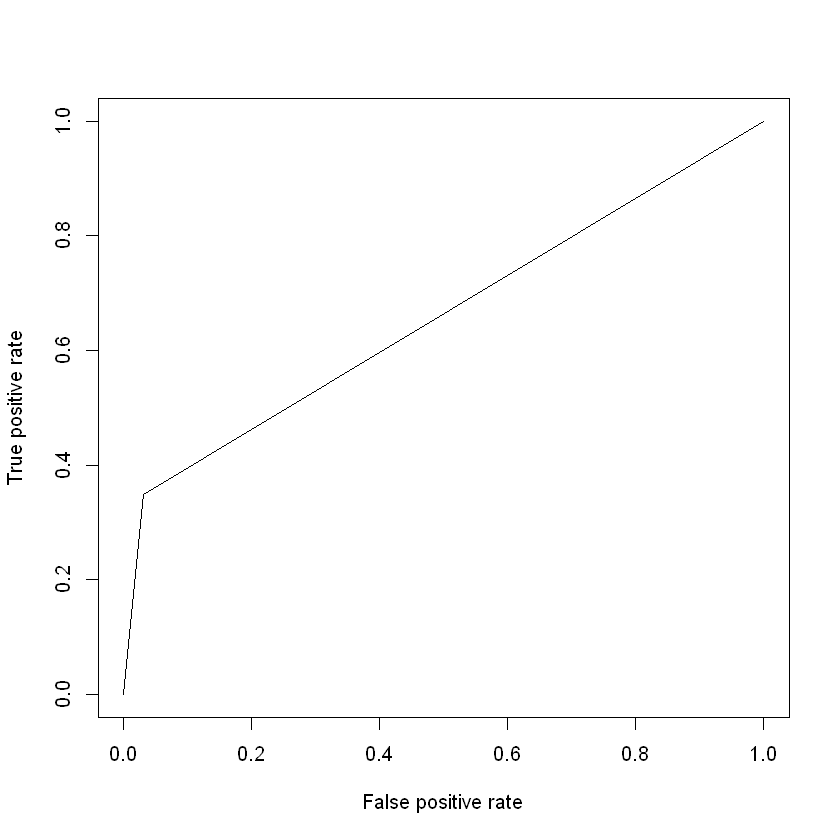

In [51]:
ROC.perf <- performance(pred, "tpr", "fpr");
plot (ROC.perf);

In [52]:
auc.tmp <- performance(pred,"auc");
auc <- as.numeric(auc.tmp@y.values)
auc

[1] 0.6592287

This case study just for showing the functions of ARTML. Better feature engineering and model selection could further improve the model performance.

-------------------------------------------------